In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
fert_df = pd.read_excel('/mnt/Datasets/CFT_MEXICO.xlsx', sheet_name = 'Fertilizer-Manure')
fert_df.columns = fert_df.iloc[0]
fert_df = fert_df.iloc[1:].reset_index(drop = True)

fert_df.update(fert_df[['% N as Urea', '% N as Nitrate', '% N as Ammonium','% P as Phosphorous', '% P as P2O5', '% K as Potassium', '% K as K2O']].fillna(0))

fert_df['N_total_percent'] = 0
fert_df['P_total_percent'] = 0
fert_df['K_total_percent'] = 0

##
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Urea - 46% N', 'N_total_percent'] = 46

##
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Anhydrous ammonia - 82% N', 'N_total_percent'] = 82

##
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Urea ammonium nitrate solution - 32% N', 'N_total_percent'] = 32

##
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Compound NPK - 15% N / 15% K2O / 15% P2O5', 'N_total_percent'] = 15
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Compound NPK - 15% N / 15% K2O / 15% P2O5', 'K_total_percent'] = 15 ##
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Compound NPK - 15% N / 15% K2O / 15% P2O5', 'P_total_percent'] = 15 ##

##
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Phosphate/Rock Phosphate - 32% P2O5', 'P_total_percent'] = 32 ##

##
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Potassium sulphate - 50% K2O / 45% SO3', 'K_total_percent'] = 50 ##

##
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Ammonium nitrate - 33.5% N (granulated)', 'N_total_percent'] = 33.5

##
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Ammonium sulphate - 21% N', 'N_total_percent'] = 21

##
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Ammonium chloride - 25% N', 'N_total_percent'] = 25

##
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Diammonium phosphate - 18% N / 46% P2O5', 'N_total_percent'] = 18
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Diammonium phosphate - 18% N / 46% P2O5', 'P_total_percent'] = 46 ##

##
fert_df.loc[fert_df['Select Fertilizer Type'] == 'Muriate of potash / Potassium chloride - 60% K2O', 'K_total_percent'] = 60 ##

fert_df['N_total_kg_per_Ha'] = fert_df['N_total_percent']*fert_df['Enter Application Rate'] / 100
fert_df['P_total_kg_per_Ha'] = fert_df['P_total_percent']*fert_df['Enter Application Rate'] / 100
fert_df['K_total_kg_per_Ha'] = fert_df['K_total_percent']*fert_df['Enter Application Rate'] / 100

# fert_df.columns
fert_df = fert_df.drop(columns = ['Country', 'Geography', 'Harvest Year', 'Select Fertilizer Type', 'Select Units of Product or Nutrient', \
                                  'Enter Application Rate', 'Select Rate Unit', 'Select Emissions Inihibitors', '% N as Urea', \
                                 '% N as Nitrate', '% N as Ammonium', '% P as Phosphorous', '% P as P2O5', '% K as Potassium', \
                                 '% K as K2O', 'N_total_percent', 'P_total_percent', 'K_total_percent'])

# fert_df['Field Name'].value_counts()
# print(display(fert_df[fert_df['Field Name'] == 'Lote Batamote']))

#######
# Keep columns Select Manufacturing Region? Select Application Method?
#######

#######
# How to decide which row for field we keep? Are we to sum across fields? <- likely sum per field
#######

# plt.figure()
# fert_df['N_total_kg_per_Ha'].hist()
# plt.figure()
# fert_df['P_total_kg_per_Ha'].hist()
# plt.figure()
# fert_df['K_total_kg_per_Ha'].hist()

# print(fert_df['Select Manufacturing Region'].value_counts())
# print(fert_df['Select Application Method'].value_counts())

fert_df = fert_df[['Field Name', 'N_total_kg_per_Ha', 'P_total_kg_per_Ha', 'K_total_kg_per_Ha']]
N_column = fert_df.groupby('Field Name')['N_total_kg_per_Ha'].sum()
P_column = fert_df.groupby('Field Name')['P_total_kg_per_Ha'].sum()
K_column = fert_df.groupby('Field Name')['K_total_kg_per_Ha'].sum()
field_column = N_column.index

fert_df = pd.DataFrame({'Field Name': field_column, 'N_total_kg_per_Ha': N_column, 'P_total_kg_per_Ha': P_column, 'K_total_kg_per_Ha': K_column}).reset_index(drop = True)

print(display(fert_df))

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Field Name,N_total_kg_per_Ha,P_total_kg_per_Ha,K_total_kg_per_Ha
0,60 (Pivote Valencia),184.0,0.0,0.0
1,60.E (Esquinas Pivote Valencia),184.0,0.0,0.0
2,70 (Pivote Campo 5),184.0,0.0,0.0
3,70.E (Esquinas Campo 5),184.0,0.0,0.0
4,71 (Pivote Impulsora),184.0,0.0,0.0
...,...,...,...,...
88,Urbi 2,297.5,67.5,67.5
89,Urbi 3,297.5,67.5,67.5
90,Valentin,0.0,0.0,0.0
91,Zazueta 3,0.0,0.0,0.0


None


In [18]:
farm_crop_soil_df = pd.read_excel('/mnt/Datasets/CFT_MEXICO.xlsx', sheet_name = 'Farm-Crop-Soil')
farm_crop_soil_df.columns = farm_crop_soil_df.iloc[0]
farm_crop_soil_df = farm_crop_soil_df.iloc[1:].reset_index(drop = True)

farm_crop_soil_df['Yield_kg_per_ha'] = farm_crop_soil_df['Enter Dry Finished Yield Mass (kg)'] / farm_crop_soil_df['Enter Crop Area (ha)']
farm_crop_soil_df = farm_crop_soil_df.drop(columns = ['Country', 'Geography', 'Harvest Year', 'Select Climate', 'Select Crop Name', \
                                                      'Enter Seed Amount (If Potato)', 'Select Seed Amount Unit (If Potato)', \
                                                      'Enter Residue Amount (kg/ha) - Optional', 'Selct Residue Management Practice', 'Select Soil Moisture ', \
                                                     'Enter Total Wet Mass Harvested (kg)', 'Enter Dry Finished Yield Mass (kg)', 'Enter Crop Area (ha)'])

farm_crop_soil_df['Enter Latitude'] = farm_crop_soil_df['Enter Latitude'].astype(str)

farm_crop_soil_df.loc[[0,1,2,3,4,5,6,7,25,32,33,68,69], 'Enter Latitude'] = farm_crop_soil_df.loc[[0,1,2,3,4,5,6,7,25,32,33,68,69], 'Enter Latitude'].str[:2] + '.' + farm_crop_soil_df.loc[[0,1,2,3,4,5,6,7,25,32,33,68,69], 'Enter Latitude'].str[2:]
farm_crop_soil_df.loc[farm_crop_soil_df['Enter Latitude'].str.contains(","), 'Enter Latitude'] = farm_crop_soil_df.loc[farm_crop_soil_df['Enter Latitude'].str.contains(","), 'Enter Latitude'].str[:-2]
farm_crop_soil_df['Enter Latitude'] = farm_crop_soil_df['Enter Latitude'].astype(float)

farm_crop_soil_df['Enter Longitude'] = farm_crop_soil_df['Enter Longitude'].abs() * (-1)
farm_crop_soil_df['Enter Longitude'] = farm_crop_soil_df['Enter Longitude'].astype(str)
farm_crop_soil_df.loc[[0,1,2,3,4,5,6,7,25,32,33,68,69], 'Enter Longitude'] = farm_crop_soil_df.loc[[0,1,2,3,4,5,6,7,25,32,33,68,69], 'Enter Longitude'].str[:4] + '.' + farm_crop_soil_df.loc[[0,1,2,3,4,5,6,7,25,32,33,68,69], 'Enter Longitude'].str[4:]
farm_crop_soil_df['Enter Longitude'] = farm_crop_soil_df['Enter Longitude'].astype(float)

print(display(farm_crop_soil_df))

print(farm_crop_soil_df['Enter Avg Annual Temp (℃) - Optional'].value_counts())
print(farm_crop_soil_df['Select Soil Texture'].value_counts())
print(farm_crop_soil_df['Select Soil Drainage'].value_counts())
print(farm_crop_soil_df['Enter Soil pH'].value_counts())

#######
# Keep columns Enter Avg Annual Temp (℃) - Optional? Select Soil Texture? Select Soil Drainage?
#######

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Field Name,Enter Latitude,Enter Longitude,Enter Avg Annual Temp (℃) - Optional,Select Soil Texture,Enter Soil Organic Matter,Select Soil Drainage,Enter Soil pH,Yield_kg_per_ha
0,60 (Pivote Valencia),25.700292,-108.660012,25.5,silt (medium),1.22,good,7.52,2639.649615
1,60.E (Esquinas Pivote Valencia),25.700359,-108.661938,25.5,silt (medium),1.22,good,7.52,1690.585106
2,70 (Pivote Campo 5),25.676046,-108.665099,25.5,silt (medium),1.11,good,6.01,4600.105333
3,70.E (Esquinas Campo 5),25.672436,-108.665614,25.5,silt (medium),1.11,good,6.01,4032.79171
4,71 (Pivote Impulsora),25.668145,-108.676987,25.5,silt (medium),1,good,7,4557.484751
...,...,...,...,...,...,...,...,...,...
88,Urbi 2,25.784347,-109.056959,28,silt (medium),1.19,good,6.02,2515.142857
89,Urbi 3,25.785596,-109.049606,28,silt (medium),1.19,good,6.02,3066.986087
90,Valentin,24.659115,-107.801056,25.2,silt (medium),0.81,good,7.6,3226.858
91,Zazueta 3,24.577607,-107.571537,25.2,clay (fine),0.9,good,7.1,3905.239286


None
25.5    27
25.2    22
28.0    21
24.7    16
20.0     7
Name: Enter Avg Annual Temp (℃) - Optional, dtype: int64
silt (medium)     63
clay (fine)       28
sandy (coarse)     2
Name: Select Soil Texture, dtype: int64
good    89
poor     4
Name: Select Soil Drainage, dtype: int64
7.10    14
7.00    10
6.50     6
6.80     6
6.02     4
6.40     4
7.20     3
7.60     3
7.30     3
6.94     2
7.08     2
6.07     2
6.01     2
6.90     2
6.10     2
7.52     2
6.20     2
8.00     2
6.17     2
7.50     2
6.95     2
6.87     1
6.23     1
7.04     1
5.42     1
7.53     1
6.77     1
6.60     1
5.01     1
7.34     1
7.12     1
5.90     1
6.75     1
6.98     1
6.11     1
6.32     1
6.70     1
Name: Enter Soil pH, dtype: int64


In [19]:
crop_protection_df = pd.read_excel('/mnt/Datasets/CFT_MEXICO.xlsx', sheet_name = 'Crop Protection')
crop_protection_df.columns = crop_protection_df.iloc[0]
crop_protection_df = crop_protection_df.iloc[1:].reset_index(drop = True)
crop_protection_df = crop_protection_df.drop(columns = ['Country', 'Geography', 'Harvest Year', 'Select Category', \
                                                       'If Soil Treatment: Enter Application Rate ', 'If Soil Treatment: Enter Rate Unit', \
                                                       'If Soil Treatment: Enter % Active Ingredient'])

print(display(crop_protection_df))

print(crop_protection_df['Enter # of Applications (Doses)'].value_counts())

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Field Name,Enter # of Applications (Doses)
0,60 (Pivote Valencia),8
1,60.E (Esquinas Pivote Valencia),8
2,70 (Pivote Campo 5),8
3,70.E (Esquinas Campo 5),8
4,71 (Pivote Impulsora),8
...,...,...
88,Urbi 2,6
89,Urbi 3,6
90,Valentin,6
91,Zazueta 3,6


None
6     55
7     15
8     11
9      6
5      3
16     1
4      1
3      1
Name: Enter # of Applications (Doses), dtype: int64


In [20]:
#Don't consider this dataset
energy_usage_df = pd.read_excel('/mnt/Datasets/CFT_MEXICO.xlsx', sheet_name = 'Energy Usage')
energy_usage_df.columns = energy_usage_df.iloc[0]
energy_usage_df = energy_usage_df.iloc[1:].reset_index(drop = True)

energy_usage_df = energy_usage_df[['Field Name', 'Select Machine', 'Enter # of Passes']]

print(display(energy_usage_df))

#######
# Multiple values per Field Name-- Which ones to keep?
#######

print(energy_usage_df['Select Machine'].value_counts())
print(energy_usage_df['Enter # of Passes'].value_counts())

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Field Name,Select Machine,Enter # of Passes
0,60 (Pivote Valencia),disc harrow,4
1,60 (Pivote Valencia),subsoiler,2
2,60 (Pivote Valencia),land plane/destoner,1
3,60 (Pivote Valencia),ridging,1
4,60 (Pivote Valencia),herbicide spraying,1
...,...,...,...
869,Zona Industrial,ridging,1
870,Zona Industrial,row crop planter,1
871,Zona Industrial,row crop cultivator,1
872,Zona Industrial,biocide spraying,6


None
row crop cultivator        104
disc harrow                 98
row crop planter            93
corn combine                86
subsoiler                   78
biocide spraying            64
herbicide spraying          59
ridging                     54
land plane/destoner         51
mower-conditioner           42
fertiliser spreading        31
chisel plough               18
coulter                     16
field cultivator/ridger     13
disk bedder                 13
roller harrow               12
mower/grader                11
disc gang                   10
moldboard plough             7
rod weeder                   7
combine                      7
Name: Select Machine, dtype: int64
1    582
2    159
3     54
6     43
4     17
7     17
9      2
Name: Enter # of Passes, dtype: int64


In [21]:
irrigation_df = pd.read_excel('/mnt/Datasets/CFT_MEXICO.xlsx', sheet_name = 'Irrigation')
irrigation_df.columns = irrigation_df.iloc[0]
irrigation_df = irrigation_df.iloc[1:].reset_index(drop = True)

irrigation_df = irrigation_df.drop(columns = ['Country', 'Geography', 'Harvest Year', 'Select Application Unit', 'Enter % Area Irrigated'])

#######
# Keep columns Select Method? Select Water Source? Select Power Source? Enough variation in Enter Pumping Depth? Enter Pumping Distance? Total Water applied?
#######

print(display(irrigation_df))

print(irrigation_df['Select Method'].value_counts())
print(irrigation_df['Select Water Source'].value_counts())
print(irrigation_df['Select Power Source'].value_counts())
print(irrigation_df['Enter Pumping Depth (m)'].value_counts())
print(irrigation_df['Enter Total Water Applied'].value_counts())

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Field Name,Select Method,Select Water Source,Select Power Source,Enter Pumping Depth (m),Enter Pumping Distance (m),Enter Total Water Applied
0,60 (Pivote Valencia),Pivot,River/stream/ditch,Electric,3,6,600
1,60.E (Esquinas Pivote Valencia),Flooding,River/stream/ditch,Gravity,0,0,750
2,70 (Pivote Campo 5),Pivot,River/stream/ditch,Electric,3,6,600
3,70.E (Esquinas Campo 5),Flooding,River/stream/ditch,Gravity,0,0,750
4,71 (Pivote Impulsora),Pivot,River/stream/ditch,Electric,3,6,600
...,...,...,...,...,...,...,...
88,Urbi 2,Flooding,River/stream/ditch,Gravity,0,0,750
89,Urbi 3,Flooding,River/stream/ditch,Gravity,0,0,750
90,Valentin,Flooding,River/stream/ditch,Gravity,0,0,750
91,Zazueta 3,Flooding,River/stream/ditch,Gravity,0,0,750


None
Flooding    64
Pivot       15
Drip        14
Name: Select Method, dtype: int64
River/stream/ditch    90
Reservoir              2
Borehole/well          1
Name: Select Water Source, dtype: int64
Gravity     64
Electric    27
Diesel       2
Name: Select Power Source, dtype: int64
0     55
3     23
6     12
4      2
56     1
Name: Enter Pumping Depth (m), dtype: int64
750    64
500    13
600    12
588     4
Name: Enter Total Water Applied, dtype: int64


In [ ]:
#most important questions: 
#1. how to aggregate fert_df to have one field per row when other columns are different
#2. how to use energy usage df (874 rows)

In [22]:
CO2_results = pd.read_excel('/mnt/Datasets/LATAM_Mexico_Efrain_result_2_rerun.xlsx', sheet_name = 'summary')
CO2_results = CO2_results[CO2_results['unit'] == 'kgCO2e/ha'].reset_index(drop = True)
CO2_results = CO2_results[['Field Name', 'value']]
CO2_results = CO2_results.rename(columns = {'value': 'CO2_kg_per_Ha'})
print(display(CO2_results))

,Field Name,CO2_kg_per_Ha
0,60 (Pivote Valencia),3699.18
1,Lote Tochy,3632.95
2,Pivote 5 y 100,3314.64
3,Pivote 45,3808.75
4,Pivote 32,3812.94
...,...,...
88,Esmeralda,2761.57
89,Empaque,2197.74
90,El coyote,4489.32
91,El Potrero,4316.42


None


In [23]:
final_merged_df = fert_df.merge(farm_crop_soil_df, how = 'left', on = 'Field Name')
final_merged_df = final_merged_df.merge(crop_protection_df, how = 'left', on = 'Field Name')
final_merged_df = final_merged_df.merge(irrigation_df, how = 'left', on = 'Field Name')
final_merged_df = final_merged_df.merge(CO2_results, how = 'left', on = 'Field Name')

final_merged_df[['N_total_kg_per_Ha','P_total_kg_per_Ha','K_total_kg_per_Ha', 'Enter Avg Annual Temp (℃) - Optional', 'Enter Soil Organic Matter',\
   'Enter Soil pH', 'Yield_kg_per_ha', 'Enter # of Applications (Doses)', 'Enter Pumping Depth (m)', 'Enter Pumping Distance (m)', \
   'Enter Total Water Applied']] = final_merged_df[['N_total_kg_per_Ha','P_total_kg_per_Ha','K_total_kg_per_Ha', 'Enter Avg Annual Temp (℃) - Optional', 'Enter Soil Organic Matter',\
   'Enter Soil pH', 'Yield_kg_per_ha', 'Enter # of Applications (Doses)', 'Enter Pumping Depth (m)', 'Enter Pumping Distance (m)', \
   'Enter Total Water Applied']].apply(pd.to_numeric, errors='coerce')

final_merged_df['Yield_to_CO2_ratio'] = final_merged_df['Yield_kg_per_ha'] / final_merged_df['CO2_kg_per_Ha']

print(display(final_merged_df))

,Field Name,N_total_kg_per_Ha,P_total_kg_per_Ha,K_total_kg_per_Ha,Enter Latitude,Enter Longitude,Enter Avg Annual Temp (℃) - Optional,Select Soil Texture,Enter Soil Organic Matter,Select Soil Drainage,...,Yield_kg_per_ha,Enter # of Applications (Doses),Select Method,Select Water Source,Select Power Source,Enter Pumping Depth (m),Enter Pumping Distance (m),Enter Total Water Applied,CO2_kg_per_Ha,Yield_to_CO2_ratio
0,60 (Pivote Valencia),184.0,0.0,0.0,25.700292,-108.660012,25.5,silt (medium),1.22,good,...,2639.649615,8,Pivot,River/stream/ditch,Electric,3,6,600,3699.18,0.713577
1,60.E (Esquinas Pivote Valencia),184.0,0.0,0.0,25.700359,-108.661938,25.5,silt (medium),1.22,good,...,1690.585106,8,Flooding,River/stream/ditch,Gravity,0,0,750,3809.20,0.443816
2,70 (Pivote Campo 5),184.0,0.0,0.0,25.676046,-108.665099,25.5,silt (medium),1.11,good,...,4600.105333,8,Pivot,River/stream/ditch,Electric,3,6,600,3866.82,1.189635
3,70.E (Esquinas Campo 5),184.0,0.0,0.0,25.672436,-108.665614,25.5,silt (medium),1.11,good,...,4032.791710,8,Flooding,River/stream/ditch,Gravity,0,0,750,3731.24,1.080818
4,71 (Pivote Impulsora),184.0,0.0,0.0,25.668145,-108.676987,25.5,silt (medium),1.00,good,...,4557.484751,8,Pivot,River/stream/ditch,Electric,3,6,600,3872.23,1.176966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Urbi 2,297.5,67.5,67.5,25.784347,-109.056959,28.0,silt (medium),1.19,good,...,2515.142857,6,Flooding,River/stream/ditch,Gravity,0,0,750,4624.47,0.543877
89,Urbi 3,297.5,67.5,67.5,25.785596,-109.049606,28.0,silt (medium),1.19,good,...,3066.986087,6,Flooding,River/stream/ditch,Gravity,0,0,750,4634.07,0.661834
90,Valentin,0.0,0.0,0.0,24.659115,-107.801056,25.2,silt (medium),0.81,good,...,3226.858000,6,Flooding,River/stream/ditch,Gravity,0,0,750,2534.95,1.272947
91,Zazueta 3,0.0,0.0,0.0,24.577607,-107.571537,25.2,clay (fine),0.90,good,...,3905.239286,6,Flooding,River/stream/ditch,Gravity,0,0,750,4971.25,0.785565


None


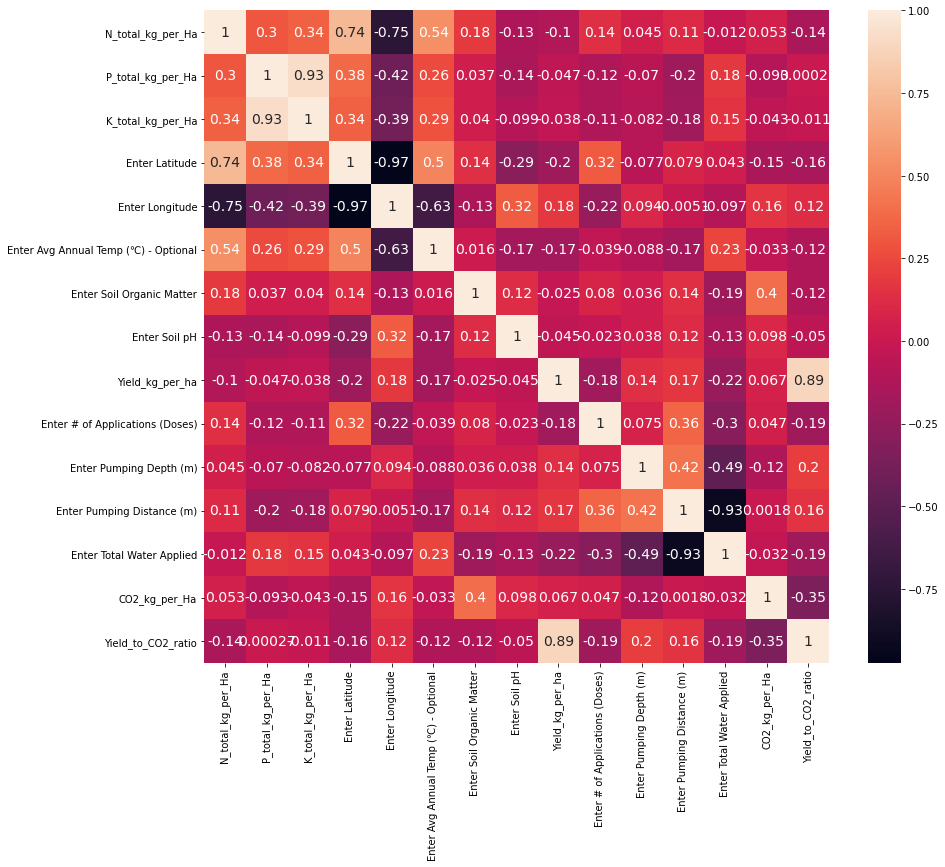

In [10]:
#no subset
corr_matrix = final_merged_df.corr()
plt.figure(figsize = (14, 12))
sns.heatmap(corr_matrix, annot = True, annot_kws={"fontsize":14})
sns.set(font_scale = 1)
plt.show()

In [24]:
# middle 90 percentile
p=.9

q_low = final_merged_df["Yield_to_CO2_ratio"].quantile(1-p)
q_hi = final_merged_df["Yield_to_CO2_ratio"].quantile(p)
final_merged_df = final_merged_df[(final_merged_df["Yield_to_CO2_ratio"] < q_hi) & (final_merged_df["Yield_to_CO2_ratio"] > q_low)].reset_index(drop = True)

final_merged_df = final_merged_df.drop(columns = ['Select Soil Texture'])
final_merged_df = final_merged_df.drop(columns = ['Select Soil Drainage'])
final_merged_df = final_merged_df.drop(columns = ['Select Method'])
final_merged_df = final_merged_df.drop(columns = ['Select Water Source'])
final_merged_df = final_merged_df.drop(columns = ['Select Power Source'])

print(display(final_merged_df))

,Field Name,N_total_kg_per_Ha,P_total_kg_per_Ha,K_total_kg_per_Ha,Enter Latitude,Enter Longitude,Enter Avg Annual Temp (℃) - Optional,Enter Soil Organic Matter,Enter Soil pH,Yield_kg_per_ha,Enter # of Applications (Doses),Enter Pumping Depth (m),Enter Pumping Distance (m),Enter Total Water Applied,CO2_kg_per_Ha,Yield_to_CO2_ratio
0,60 (Pivote Valencia),184.0,0.0,0.0,25.700292,-108.660012,25.5,1.22,7.52,2639.649615,8,3,6,600,3699.18,0.713577
1,60.E (Esquinas Pivote Valencia),184.0,0.0,0.0,25.700359,-108.661938,25.5,1.22,7.52,1690.585106,8,0,0,750,3809.20,0.443816
2,70 (Pivote Campo 5),184.0,0.0,0.0,25.676046,-108.665099,25.5,1.11,6.01,4600.105333,8,3,6,600,3866.82,1.189635
3,70.E (Esquinas Campo 5),184.0,0.0,0.0,25.672436,-108.665614,25.5,1.11,6.01,4032.791710,8,0,0,750,3731.24,1.080818
4,71 (Pivote Impulsora),184.0,0.0,0.0,25.668145,-108.676987,25.5,1.00,7.00,4557.484751,8,3,6,600,3872.23,1.176966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Urbi 1,297.5,67.5,67.5,25.781345,-109.044499,28.0,1.19,6.02,2150.542381,6,0,0,750,4620.16,0.465469
69,Urbi 2,297.5,67.5,67.5,25.784347,-109.056959,28.0,1.19,6.02,2515.142857,6,0,0,750,4624.47,0.543877
70,Urbi 3,297.5,67.5,67.5,25.785596,-109.049606,28.0,1.19,6.02,3066.986087,6,0,0,750,4634.07,0.661834
71,Valentin,0.0,0.0,0.0,24.659115,-107.801056,25.2,0.81,7.60,3226.858000,6,0,0,750,2534.95,1.272947


None


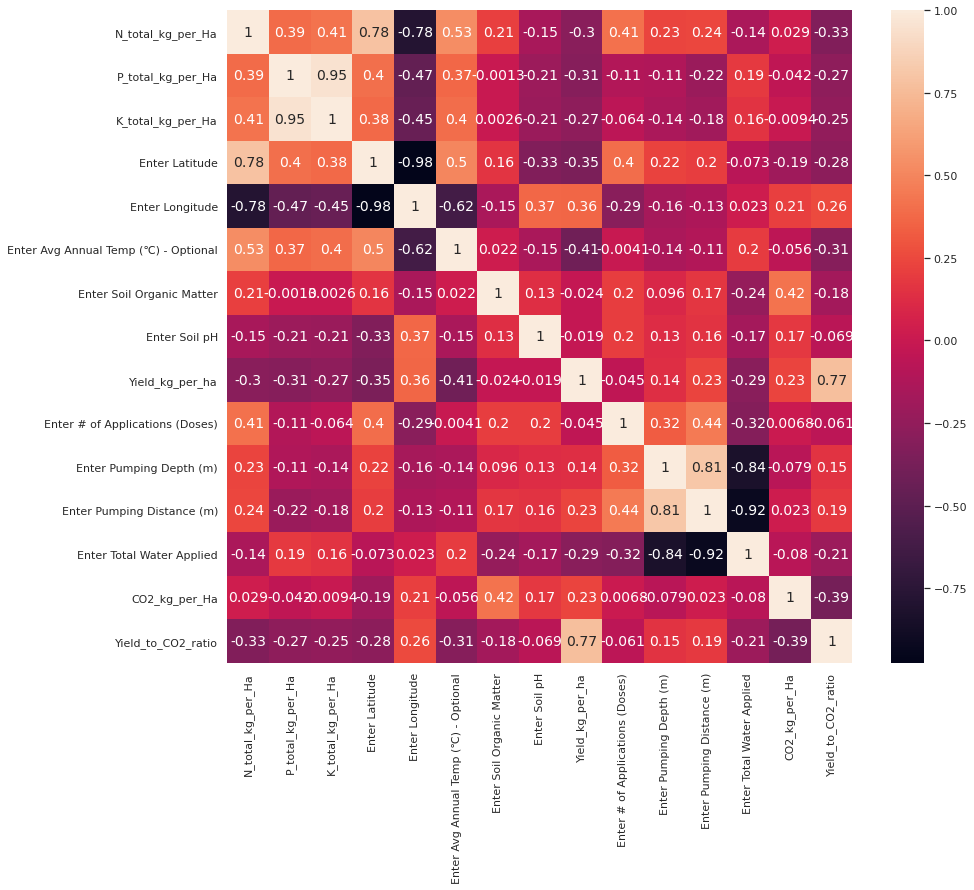

In [12]:
corr_matrix = final_merged_df.corr()
plt.figure(figsize = (14, 12))
sns.heatmap(corr_matrix, annot = True, annot_kws={"fontsize":14})
sns.set(font_scale = 1)
plt.show()

In [13]:
#Subsetting by mean value differ-- redo for yield to co2 ratio

# q_low = final_merged_df["Yield_to_CO2_ratio"].quantile(1-p)
# q_hi = final_merged_df["Yield_to_CO2_ratio"].quantile(p)
# final_merged_df = final_merged_df[(final_merged_df["Yield_to_CO2_ratio"] < q_hi) & (final_merged_df["Yield_to_CO2_ratio"] > q_low)].reset_index(drop = True)

# final_merged_df['Select Soil Texture'].value_counts()
print(final_merged_df[final_merged_df['Select Soil Texture'] == 'silt (medium)']['Yield_to_CO2_ratio'].mean())
print(final_merged_df[final_merged_df['Select Soil Texture'] == 'clay (fine)']['Yield_to_CO2_ratio'].mean())
print(final_merged_df[final_merged_df['Select Soil Texture'] == 'sandy (coarse)']['Yield_to_CO2_ratio'].mean())
final_merged_df = final_merged_df[final_merged_df['Select Soil Texture'] != 'sandy (coarse)'].reset_index(drop = True)
final_merged_df = final_merged_df.drop(columns = ['Select Soil Texture'])

# print(final_merged_df['Select Soil Drainage'].value_counts())
# print(final_merged_df['Yield_kg_per_ha'].mean())
# print(final_merged_df['Yield_kg_per_ha'].std())
print(final_merged_df[final_merged_df['Select Soil Drainage'] == 'good']['Yield_to_CO2_ratio'].mean())
print(final_merged_df[final_merged_df['Select Soil Drainage'] == 'poor']['Yield_to_CO2_ratio'].mean())
final_merged_df = final_merged_df[final_merged_df['Select Soil Drainage'] == 'good'].reset_index(drop = True)
final_merged_df = final_merged_df.drop(columns = ['Select Soil Drainage'])

# print(final_merged_df['Select Method'].value_counts())
print(final_merged_df[final_merged_df['Select Method'] == 'Pivot']['Yield_to_CO2_ratio'].mean())
print(final_merged_df[final_merged_df['Select Method'] == 'Flooding']['Yield_to_CO2_ratio'].mean())
print(final_merged_df[final_merged_df['Select Method'] == 'Drip']['Yield_to_CO2_ratio'].mean())
final_merged_df = final_merged_df[final_merged_df['Select Method'] != 'Drip'].reset_index(drop = True)
final_merged_df = final_merged_df.drop(columns = ['Select Method'])

# print(final_merged_df['Select Water Source'].value_counts())
print(final_merged_df[final_merged_df['Select Water Source'] == 'River/stream/ditch']['Yield_to_CO2_ratio'].mean())
print(final_merged_df[final_merged_df['Select Water Source'] == 'Reservoir']['Yield_to_CO2_ratio'].mean())
print(final_merged_df[final_merged_df['Select Water Source'] == 'Borehole/well']['Yield_to_CO2_ratio'].mean())
final_merged_df = final_merged_df.drop(columns = ['Select Water Source'])

# print(final_merged_df['Select Power Source'].value_counts())
print(final_merged_df[final_merged_df['Select Power Source'] == 'Gravity']['Yield_to_CO2_ratio'].mean())
print(final_merged_df[final_merged_df['Select Power Source'] == 'Electric']['Yield_to_CO2_ratio'].mean())
final_merged_df = final_merged_df.drop(columns = ['Select Power Source'])

print(display(final_merged_df))

KeyError: 'Select Soil Texture'

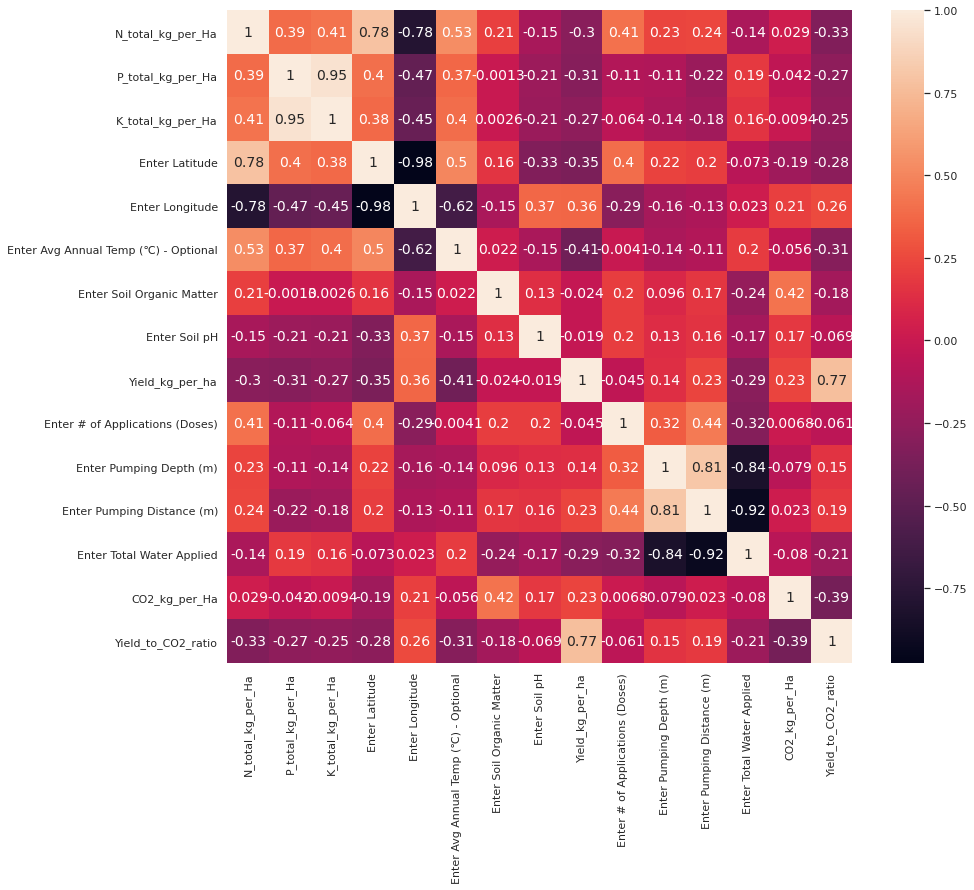

In [14]:
corr_matrix = final_merged_df.corr()
plt.figure(figsize = (14, 12))
sns.heatmap(corr_matrix, annot = True, annot_kws={"fontsize":14})
sns.set(font_scale = 1)
plt.show()

Text(0, 0.5, 'Yield_to_CO2_ratio')

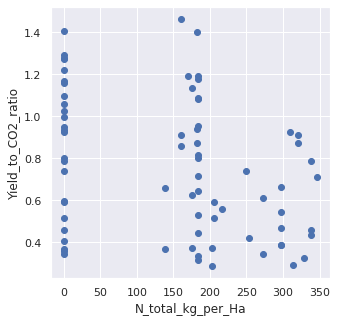

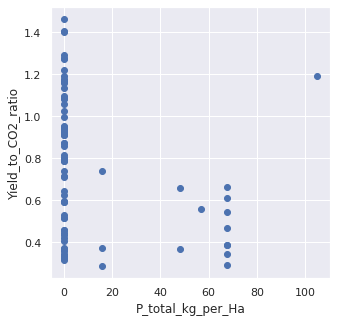

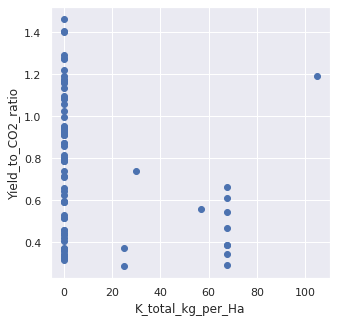

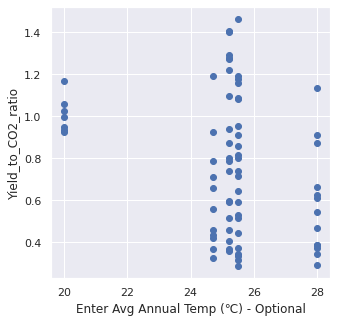

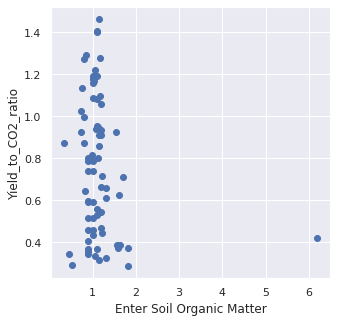

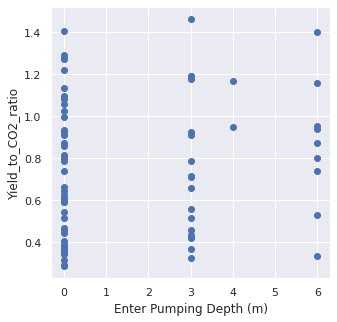

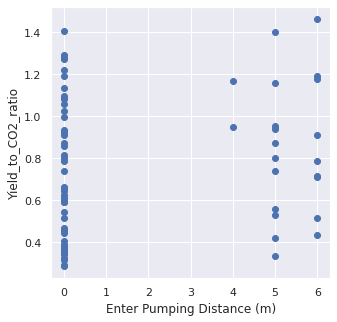

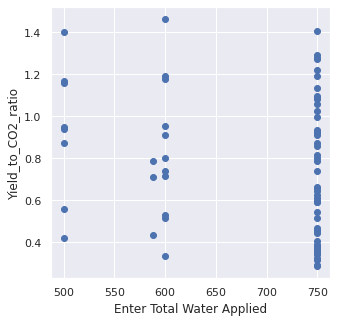

In [133]:
# final_merged_df = final_merged_df.drop(columns = ['Field Name']) 
    
plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['N_total_kg_per_Ha'], final_merged_df['Yield_to_CO2_ratio'])
plt.xlabel('N_total_kg_per_Ha')
plt.ylabel('Yield_to_CO2_ratio')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['P_total_kg_per_Ha'], final_merged_df['Yield_to_CO2_ratio'])
plt.xlabel('P_total_kg_per_Ha')
plt.ylabel('Yield_to_CO2_ratio')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['K_total_kg_per_Ha'], final_merged_df['Yield_to_CO2_ratio'])
plt.xlabel('K_total_kg_per_Ha')
plt.ylabel('Yield_to_CO2_ratio')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['Enter Avg Annual Temp (℃) - Optional'], final_merged_df['Yield_to_CO2_ratio'])
plt.xlabel('Enter Avg Annual Temp (℃) - Optional')
plt.ylabel('Yield_to_CO2_ratio')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['Enter Soil Organic Matter'], final_merged_df['Yield_to_CO2_ratio'])
plt.xlabel('Enter Soil Organic Matter')
plt.ylabel('Yield_to_CO2_ratio')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['Enter Pumping Depth (m)'], final_merged_df['Yield_to_CO2_ratio'])
plt.xlabel('Enter Pumping Depth (m)')
plt.ylabel('Yield_to_CO2_ratio')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['Enter Pumping Distance (m)'], final_merged_df['Yield_to_CO2_ratio'])
plt.xlabel('Enter Pumping Distance (m)')
plt.ylabel('Yield_to_CO2_ratio')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['Enter Total Water Applied'], final_merged_df['Yield_to_CO2_ratio'])
plt.xlabel('Enter Total Water Applied')
plt.ylabel('Yield_to_CO2_ratio')

Text(0, 0.5, 'Yield_kg_per_ha')

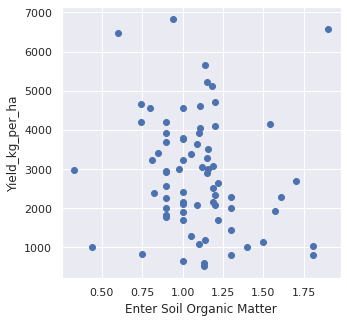

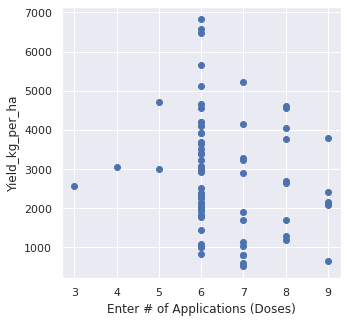

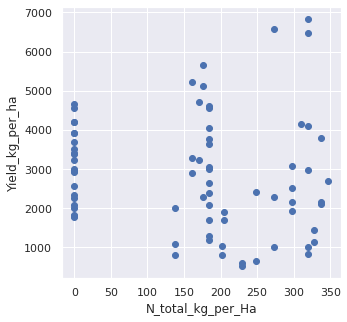

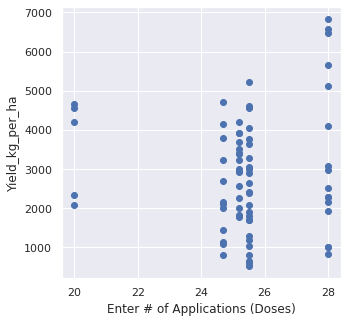

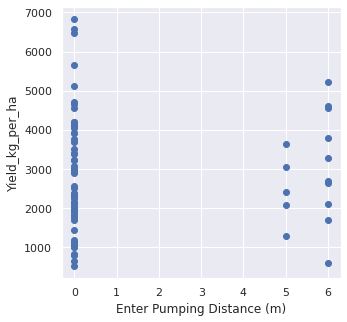

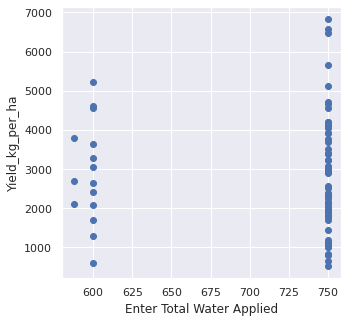

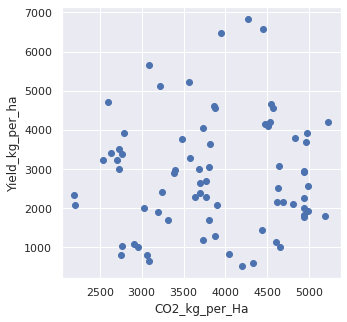

In [75]:
plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['Enter Soil Organic Matter'], final_merged_df['Yield_kg_per_ha'])
plt.xlabel('Enter Soil Organic Matter')
plt.ylabel('Yield_kg_per_ha')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['Enter # of Applications (Doses)'], final_merged_df['Yield_kg_per_ha'])
plt.xlabel('Enter # of Applications (Doses)')
plt.ylabel('Yield_kg_per_ha')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['Enter Avg Annual Temp (℃) - Optional'], final_merged_df['Yield_kg_per_ha'])
plt.xlabel('Enter # of Applications (Doses)')
plt.ylabel('Yield_kg_per_ha')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['Enter Pumping Distance (m)'], final_merged_df['Yield_kg_per_ha'])
plt.xlabel('Enter Pumping Distance (m)')
plt.ylabel('Yield_kg_per_ha')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['Enter Total Water Applied'], final_merged_df['Yield_kg_per_ha'])
plt.xlabel('Enter Total Water Applied')
plt.ylabel('Yield_kg_per_ha')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['CO2_kg_per_Ha'], final_merged_df['Yield_kg_per_ha'])
plt.xlabel('CO2_kg_per_Ha')
plt.ylabel('Yield_kg_per_ha')

Text(0, 0.5, 'Yield_kg_per_ha')

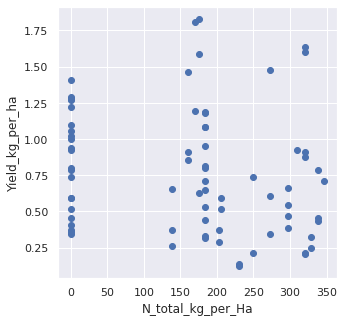

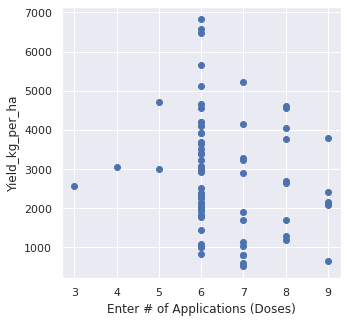

In [88]:
plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['N_total_kg_per_Ha'], final_merged_df['Yield_to_CO2_ratio'])
plt.xlabel('N_total_kg_per_Ha')
plt.ylabel('Yield_kg_per_ha')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df['Enter # of Applications (Doses)'], final_merged_df['Yield_kg_per_ha'])
plt.xlabel('Enter # of Applications (Doses)')
plt.ylabel('Yield_kg_per_ha')

In [16]:
from sklearn.preprocessing import StandardScaler

final_merged_df_no_field = final_merged_df.drop(columns = ['Field Name'])
# standard_scaler = StandardScaler().fit(final_merged_df_no_field)
# final_merged_df_no_field_scaled = standard_scaler.transform(final_merged_df_no_field)
# print(display(final_merged_df_no_field_scaled))

array([[ 0.28802079, -0.46019166, -0.43389052, ..., -1.03661583,
        -0.22978457, -0.13198006],
       [ 0.28802079, -0.46019166, -0.43389052, ...,  0.6292109 ,
        -0.12323507, -0.96080762],
       [ 0.28802079, -0.46019166, -0.43389052, ..., -1.03661583,
        -0.06743265,  1.33068781],
       ...,
       [ 1.23635821,  2.22017996,  2.3001191 , ...,  0.6292109 ,
         0.67561503, -0.29095733],
       [-1.24937202, -0.46019166, -0.43389052, ...,  0.6292109 ,
        -1.35728982,  1.5866607 ],
       [-1.24937202, -0.46019166, -0.43389052, ...,  0.6292109 ,
         1.00215895,  0.08919955]])

None


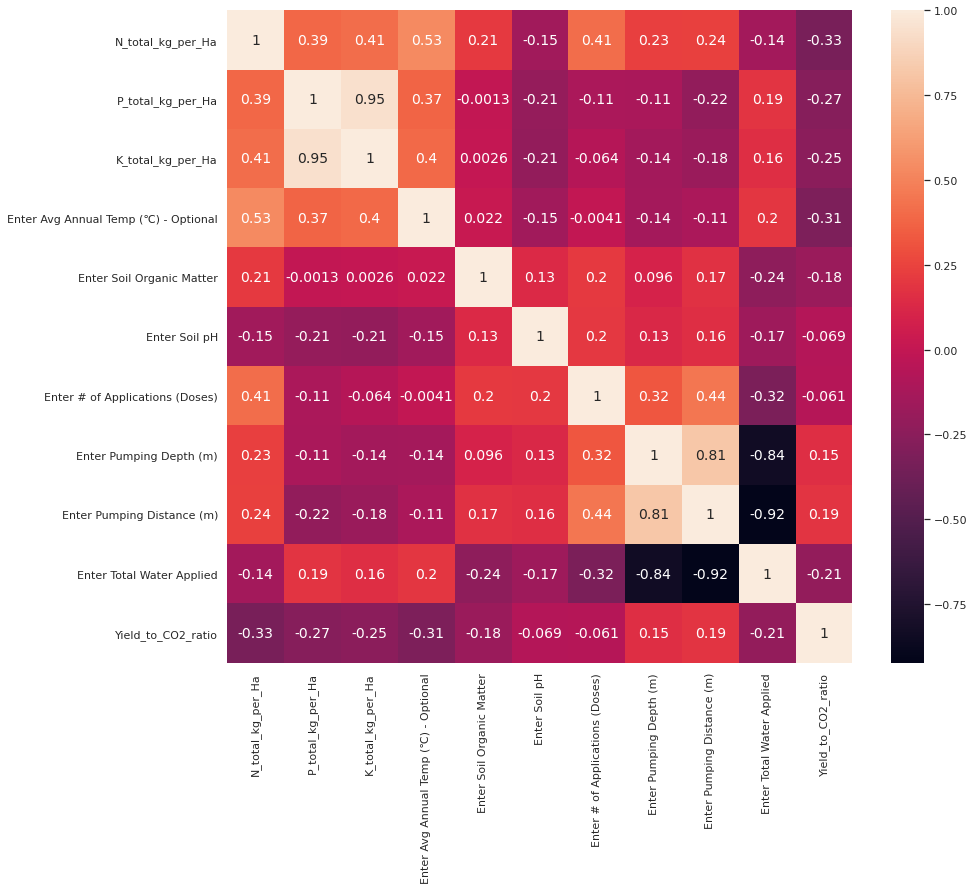

73


In [27]:
corr_matrix = final_merged_df_no_field.drop(columns = ['Enter Latitude', 'Enter Longitude', 'CO2_kg_per_Ha', 'Yield_kg_per_ha']).corr()
plt.figure(figsize = (14, 12))
sns.heatmap(corr_matrix, annot = True, annot_kws={"fontsize":14})
sns.set(font_scale = 1)
plt.show()

print(len(final_merged_df_no_field))

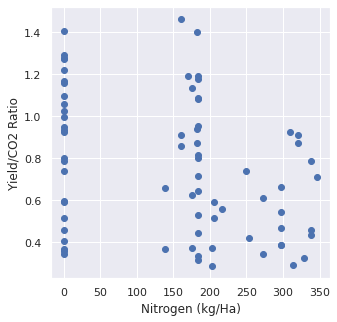

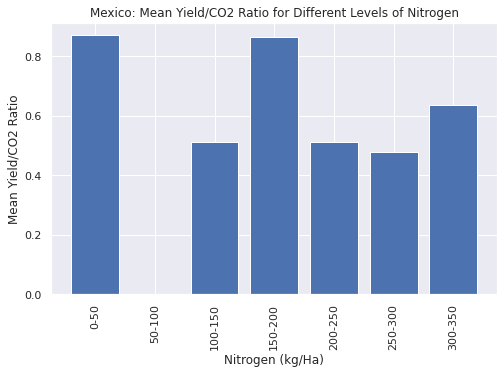

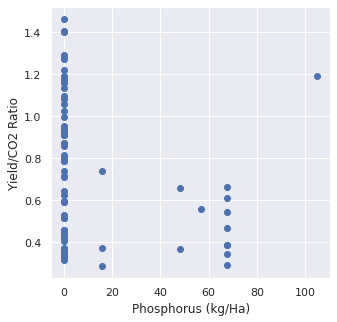

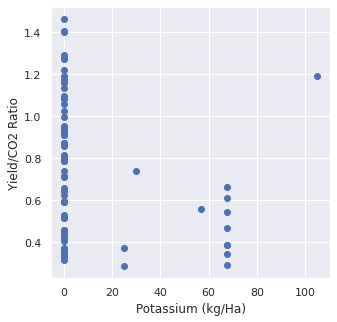

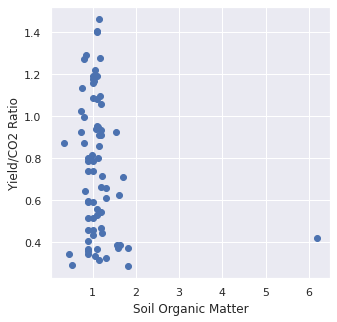

In [38]:
plt.figure(figsize = (5,5))
plt.scatter(final_merged_df_no_field['N_total_kg_per_Ha'], final_merged_df_no_field['Yield_to_CO2_ratio'])
plt.xlabel('Nitrogen (kg/Ha)')
plt.ylabel('Yield/CO2 Ratio')
plt.show()

hi = [final_merged_df_no_field[(final_merged_df_no_field["N_total_kg_per_Ha"] >= 0) & (final_merged_df_no_field["N_total_kg_per_Ha"] < 50)]['Yield_to_CO2_ratio'].mean(), \
    final_merged_df_no_field[(final_merged_df_no_field["N_total_kg_per_Ha"] >= 50) & (final_merged_df_no_field["N_total_kg_per_Ha"] < 100)]['Yield_to_CO2_ratio'].mean(), \
    final_merged_df_no_field[(final_merged_df_no_field["N_total_kg_per_Ha"] >= 100) & (final_merged_df_no_field["N_total_kg_per_Ha"] < 150)]['Yield_to_CO2_ratio'].mean(), \
    final_merged_df_no_field[(final_merged_df_no_field["N_total_kg_per_Ha"] >= 150) & (final_merged_df_no_field["N_total_kg_per_Ha"] < 200)]['Yield_to_CO2_ratio'].mean(), \
    final_merged_df_no_field[(final_merged_df_no_field["N_total_kg_per_Ha"] >= 200) & (final_merged_df_no_field["N_total_kg_per_Ha"] < 250)]['Yield_to_CO2_ratio'].mean(), \
    final_merged_df_no_field[(final_merged_df_no_field["N_total_kg_per_Ha"] >= 250) & (final_merged_df_no_field["N_total_kg_per_Ha"] < 300)]['Yield_to_CO2_ratio'].mean(), \
    final_merged_df_no_field[(final_merged_df_no_field["N_total_kg_per_Ha"] >= 300) & (final_merged_df_no_field["N_total_kg_per_Ha"] < 350)]['Yield_to_CO2_ratio'].mean()]

names = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350']

plt.figure(figsize = (8,5))
plt.bar(height = hi,x = names)
plt.xticks(rotation=90)
plt.xlabel('Nitrogen (kg/Ha)')
plt.ylabel('Mean Yield/CO2 Ratio')
plt.title('Mexico: Mean Yield/CO2 Ratio for Different Levels of Nitrogen')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df_no_field['P_total_kg_per_Ha'], final_merged_df_no_field['Yield_to_CO2_ratio'])
plt.xlabel('Phosphorus (kg/Ha)')
plt.ylabel('Yield/CO2 Ratio')
plt.show()

# hi = [final_merged_df_no_field[(final_merged_df_no_field["P_total_kg_per_Ha"] >= 0) & (final_merged_df_no_field["P_total_kg_per_Ha"] < 50)]['Yield_to_CO2_ratio'].mean(), \
#     final_merged_df_no_field[(final_merged_df_no_field["P_total_kg_per_Ha"] >= 50) & (final_merged_df_no_field["P_total_kg_per_Ha"] < 100)]['Yield_to_CO2_ratio'].mean(), \
#     final_merged_df_no_field[(final_merged_df_no_field["P_total_kg_per_Ha"] >= 100) & (final_merged_df_no_field["P_total_kg_per_Ha"] < 150)]['Yield_to_CO2_ratio'].mean(), \
#     final_merged_df_no_field[(final_merged_df_no_field["P_total_kg_per_Ha"] >= 150) & (final_merged_df_no_field["P_total_kg_per_Ha"] < 200)]['Yield_to_CO2_ratio'].mean(), \
#     final_merged_df_no_field[(final_merged_df_no_field["P_total_kg_per_Ha"] >= 200) & (final_merged_df_no_field["P_total_kg_per_Ha"] < 250)]['Yield_to_CO2_ratio'].mean(), \
#     final_merged_df_no_field[(final_merged_df_no_field["P_total_kg_per_Ha"] >= 250) & (final_merged_df_no_field["P_total_kg_per_Ha"] < 300)]['Yield_to_CO2_ratio'].mean(), \
#     final_merged_df_no_field[(final_merged_df_no_field["P_total_kg_per_Ha"] >= 300) & (final_merged_df_no_field["P_total_kg_per_Ha"] < 350)]['Yield_to_CO2_ratio'].mean()]

# names = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350']

# plt.figure(figsize = (8,5))
# plt.bar(height = hi,x = names)
# plt.xticks(rotation=90)
# plt.xlabel('Phosphorus (kg/Ha)')
# plt.ylabel('Mean Yield/CO2 Ratio')
# plt.title('Mexico: Mean Yield/CO2 Ratio for Different Levels of Potassium')

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df_no_field['K_total_kg_per_Ha'], final_merged_df_no_field['Yield_to_CO2_ratio'])
plt.xlabel('Potassium (kg/Ha)')
plt.ylabel('Yield/CO2 Ratio')
plt.show()

plt.figure(figsize = (5,5))
plt.scatter(final_merged_df_no_field['Enter Soil Organic Matter'], final_merged_df_no_field['Yield_to_CO2_ratio'])
plt.xlabel('Soil Organic Matter')
plt.ylabel('Yield/CO2 Ratio')
plt.show()

In [39]:
final_merged_df_no_field.to_csv('/mnt/Datasets/Mexico_Sust_Dataset.csv')